In [1]:
import (
    "os"
    "log"
    "bytes"
    "image/color"
    
    "gonum.org/v1/plot"
    "gonum.org/v1/plot/plotter"
    "gonum.org/v1/plot/vg"
    "github.com/go-gota/gota/dataframe"
)

In [2]:
f, err := os.Open("fleet_data.csv")
if err != nil {
    log.Fatal(err)
}
driverDF := dataframe.ReadCSV(f)
f.Close()

In [3]:
yVals := driverDF.Col("Distance_Feature").Float()

In [4]:
func displayPlot(p *plot.Plot) {
    var buf bytes.Buffer
    c, err := p.WriterTo(6*vg.Inch, 6*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    
    if _, err := c.WriteTo(&buf); err != nil {
        panic(err)
    }
    
    Display(display.PNG(buf.Bytes()))
}

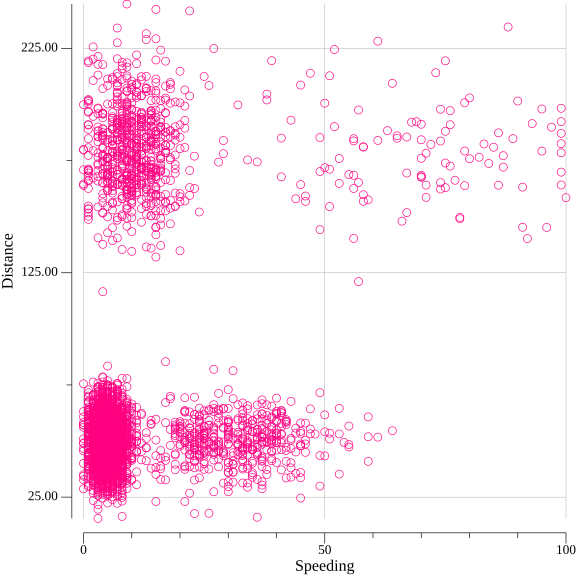

In [5]:
pts := make(plotter.XYs, driverDF.Nrow())

for i, floatVal := range driverDF.Col("Speeding_Feature").Float() {
    pts[i].X = floatVal
    pts[i].Y = yVals[i]
}

p := plot.New()
p.X.Label.Text = "Speeding"
p.Y.Label.Text = "Distance"
p.Add(plotter.NewGrid())

s, err := plotter.NewScatter(pts)
if err != nil {
    log.Fatal(err)
}
s.GlyphStyle.Color = color.RGBA{R: 255, B: 128, A: 255}
s.GlyphStyle.Radius = vg.Points(3)

p.Add(s)

displayPlot(p)